In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#Load the data
mta= pd.read_csv("/Users/sa24/Downloads/Portfolio-Project-main 2/Portfolio-Project/incidents.csv")
commuters= pd.read_csv ("/Users/sa24/Downloads/Portfolio-Project-main 2/Portfolio-Project/combined_df.csv")

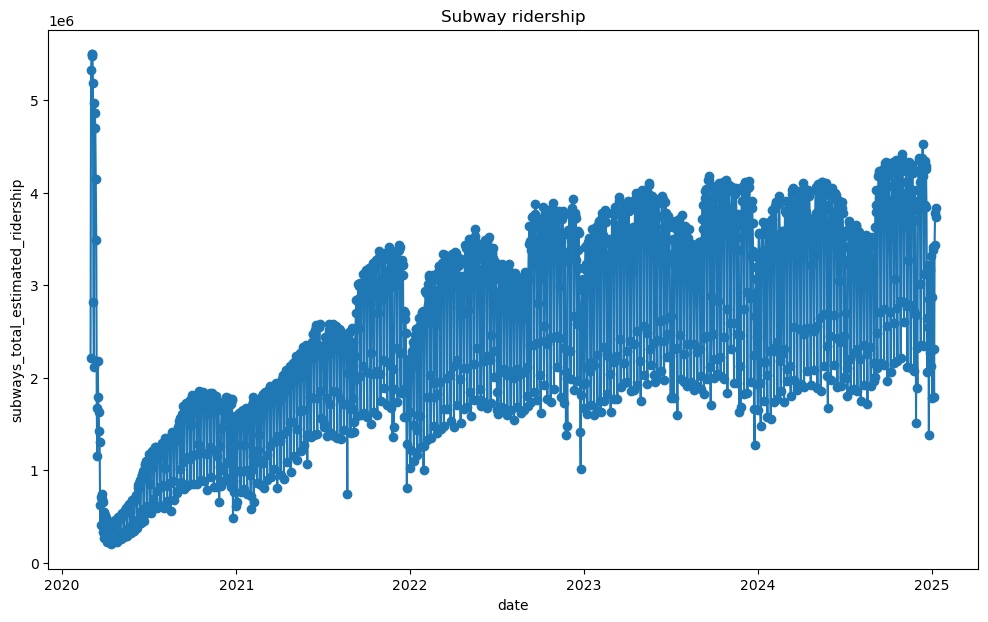

In [51]:
#convert the date to datetime
commuters['date'] = pd.to_datetime(commuters['date'])
#Plot the date as the x axis and subways_total_estimated_ridership as the y axis
plt.figure(figsize=(12, 7))
plt.plot(commuters['date'], commuters['subways_total_estimated_ridership'], marker= 'o')

#create the labels and title of the graph
plt.xlabel('date')
plt.ylabel('subways_total_estimated_ridership')
plt.title('Subway ridership')

plt.show()

# Post lockdown MTA numbers

The Graphs shows that MTA ridership has been growing steadily since lockdown was lifted. The Drop between 2020 and 2021 can be attribute to lockdown protocal going into affecr and taking a toll on the ridership.

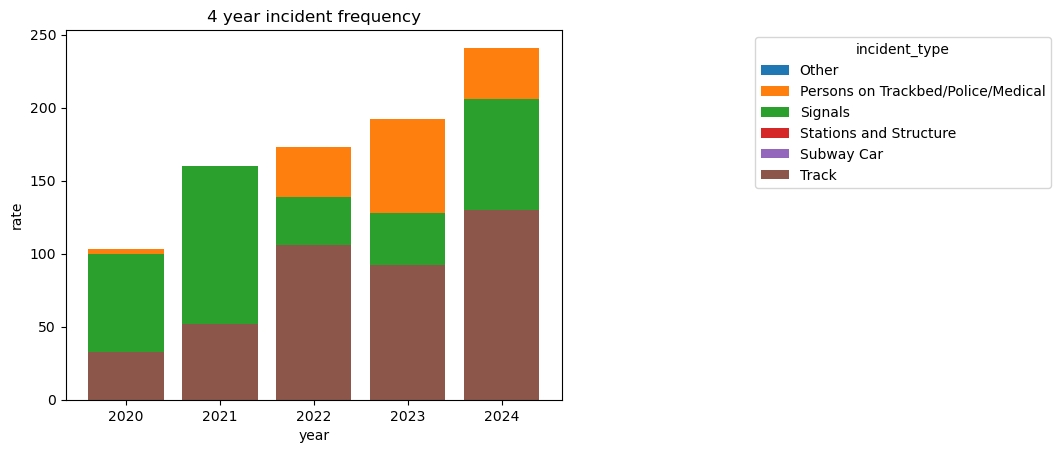

In [55]:
disturbance = pd.DataFrame(mta)
disturbance['date'] = pd.to_datetime(disturbance['date'])

#Get the year from the date column
disturbance['year'] = disturbance['date'].dt.year

#Group by Year and Incident type and add the rate at which they happen
incident_counts = disturbance.groupby(['year', 'incident_type']).agg({'incident_count': 'sum'}).reset_index()

#plot the grap and return a list of unique values 
plt.Figure(figsize=(15, 8))
for incident in incident_counts['incident_type'].unique():
    subset = incident_counts[incident_counts['incident_type'] == incident]
    plt.bar(subset['year'], subset['incident_count'], label=incident)

plt.xlabel('year')
plt.ylabel('rate')
plt.title('4 year incident frequency')
plt.legend(title= 'incident_type', bbox_to_anchor=(2, 1), loc='upper right')
plt.show()

# Rate of incidients between 2020 and 2024

The rate at which incidents occurs drastically rose from 2020 to 2021 which isn't surprising because lockdown ended in 2021. We can see that in 2020 the most common incidents that happened were signal issues, but as we get closer to 2024 track issues become more prominent.

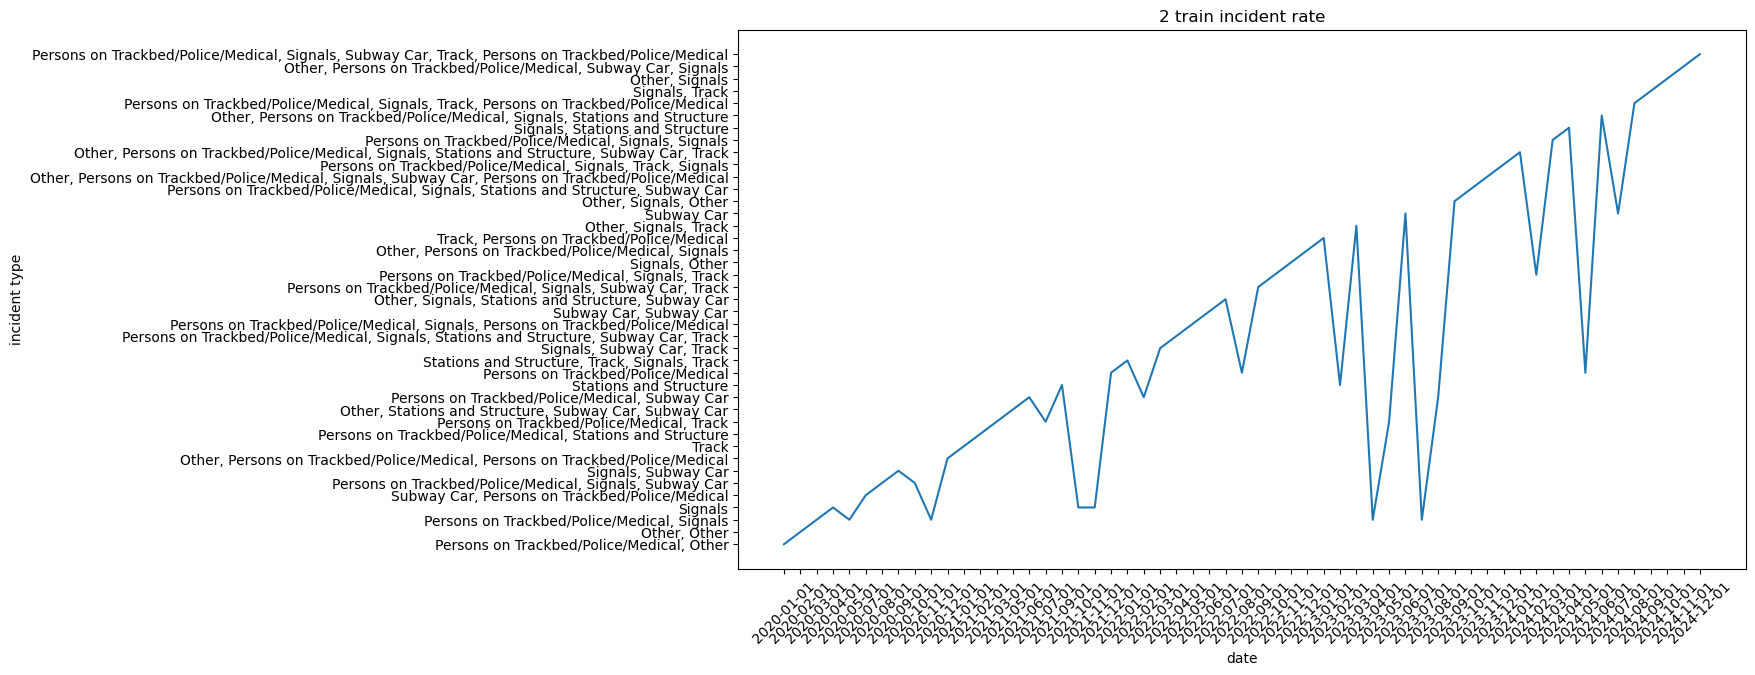

In [54]:
#Only get the information about the 2 train
dos_train = mta[mta["train_line"] == "2"]

#group the incident types that have the same dates
dos_train = dos_train.groupby('date').agg({'incident_type': lambda x: ', '.join((x))}).reset_index()

#drop duplicate dates
dos_train = dos_train.drop_duplicates(subset= "date")

#create a line plot that shows the rate of incidents between 2020-03-01 and 24-12-1
plt.figure(figsize=(13, 7))
plt.plot(dos_train['date'], dos_train['incident_type'])
plt.title("2 train incident rate")
plt.xlabel("date")
plt.ylabel("incident type")
plt.xticks(rotation=45)
plt.show()